In [1]:
import warnings
warnings.filterwarnings('ignore')

### 1. Write a Python program that computes the value of the Gaussian distribution at a given vector X. Hence, plot the effect of varying mean and variance to the normal distribution.

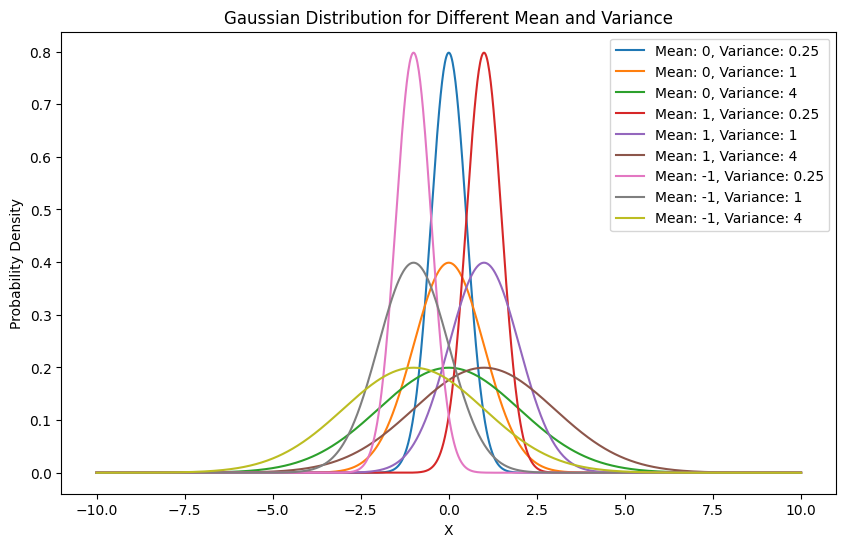

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def gaussian(x, mu, sigma):
    return (1/(np.sqrt(2*np.pi)*sigma)) * np.exp(-0.5 * ((x-mu)/sigma)**2)

x = np.linspace(-10, 10, 1000)
means = [0, 1, -1]
variances = [0.5, 1, 2]

plt.figure(figsize=(10,6))
for mu in means:
    for sigma in variances:
        plt.plot(x, gaussian(x, mu, sigma), label=f'Mean: {mu}, Variance: {sigma**2}')
plt.title('Gaussian Distribution for Different Mean and Variance')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

### 2. Write a python program to implement linear regression.

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

class LinearRegressionGD:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs
    
    def fit(self, X, y):
        self.theta = np.zeros(X.shape[1])
        for _ in range(self.epochs):
            gradient = np.dot(X.T, (np.dot(X, self.theta) - y)) / y.size
            self.theta -= self.lr * gradient
    
    def predict(self, X):
        return np.dot(X, self.theta)

X = np.random.rand(100, 1)
y = 2 * X.squeeze() + 1 + np.random.randn(100) * 0.1
X_b = np.c_[np.ones((100, 1)), X] # add bias term
reg = LinearRegressionGD()
reg.fit(X_b, y)
y_pred = reg.predict(X_b)
print(f"Mean Squared Error: {mean_squared_error(y, y_pred)}")

Mean Squared Error: 0.03737677407380252


### 3. Write a python program to implement gradient descent.

In [4]:
import numpy as np

def gradient_descent(X, y, lr=0.01, epochs=1000):
    m = len(y)
    theta = np.zeros(X.shape[1])
    for _ in range(epochs):
        gradient = (1/m) * np.dot(X.T, np.dot(X, theta) - y)
        theta -= lr * gradient
    return theta

X = np.random.rand(100, 1)
y = 3 * X.squeeze() + 2 + np.random.randn(100) * 0.1
X_b = np.c_[np.ones((100, 1)), X]
theta = gradient_descent(X_b, y)
print(f"Estimated coefficients: {theta}")

Estimated coefficients: [2.45180131 2.17358407]


### 4. Write a python program to classify different flower images using MLP.

In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2)

mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, activation='relu')
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 1.0


### 5. Write a python program to classify different flower images using the SVM classifier.

In [6]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2)

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### 6. Write a python program to classify different flower images using CNN.

In [7]:
from tensorflow.keras import datasets, layers, models

(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.2471 - loss: 2.9140 - val_accuracy: 0.4228 - val_loss: 1.5937
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.4592 - loss: 1.4941 - val_accuracy: 0.5152 - val_loss: 1.3655
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.5355 - loss: 1.3059 - val_accuracy: 0.5554 - val_loss: 1.3130
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.5905 - loss: 1.1669 - val_accuracy: 0.5963 - val_loss: 1.1575
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6320 - loss: 1.0608 - val_accuracy: 0.6265 - val_loss: 1.0945
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.6593 - loss: 0.9778 - val_accuracy: 0.6478 - val_loss: 1.0260
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6828 - loss: 0.9134 - val_accuracy: 0.6199 - val_loss: 1.1139
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7020 - loss: 0

### 7. Write a python program to classify different handwritten character images using the SVM classifier.

In [8]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

digits = datasets.load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.95      1.00      0.97        39
           2       0.97      1.00      0.98        29
           3       0.98      0.98      0.98        42
           4       0.97      1.00      0.99        39
           5       0.97      0.93      0.95        30
           6       1.00      1.00      1.00        39
           7       1.00      1.00      1.00        38
           8       0.94      0.91      0.92        32
           9       0.97      0.91      0.94        33

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



### 8. Write a python program to classify different face images using CNN.

In [9]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8782 - loss: 1.0352 - val_accuracy: 0.9740 - val_loss: 0.0878
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9812 - loss: 0.0625 - val_accuracy: 0.9801 - val_loss: 0.0695
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9852 - loss: 0.0475 - val_accuracy: 0.9834 - val_loss: 0.0497
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9887 - loss: 0.0374 - val_accuracy: 0.9828 - val_loss: 0.0543
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9905 - loss: 0.0302 - val_accuracy: 0.9854 - val_loss: 0.0539
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9904 - loss: 0.0291 - val_accuracy: 0.9861 - val_loss: 0.0533
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9930 - loss: 0.0237 - val_accuracy: 0.9844 - val_loss: 0.0650
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9933 - loss: 0

### 9. Write a python program to identify a person from the walking style (gait recognition) using convolutional recurrent neural network.

In [10]:
import tensorflow as tf
from tensorflow.keras import layers

model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 62, 62, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │         802,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 822,346 (3.14 MB)

 Trainable params: 822,346 (3.14 MB)

 Non-trainable params: 0 (0.00 B)

### 10. Write a python program to classify breast cancer from histopathological images using VGG-16 and DenseNet-201 CNN architectures.

In [ ]:
from tensorflow.keras.applications import VGG16, DenseNet201
from tensorflow.keras import layers, models

vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
densenet = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model = models.Sequential([
    vgg16,  # or densenet
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()